In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start ='2017-01-01'
end='2022-10-01'

In [3]:
data=yf.download('CL=F PTTEP.BK',start=start,end=end,period=1)

[*********************100%***********************]  2 of 2 completed


In [4]:
df=data['Adj Close']
# use adj close cause we will concern about dividened event , par event

In [5]:
df

,CL=F,PTTEP.BK
Date,,
2017-01-03,52.330002,NaN
2017-01-04,53.259998,74.474831
2017-01-05,53.759998,74.096771
2017-01-06,53.990002,74.474831
2017-01-09,51.959999,73.907738
...,...,...
2022-09-26,76.709999,166.000000
2022-09-27,78.500000,164.500000
2022-09-28,82.150002,162.000000


In [6]:
df.isnull().sum()

CL=F        42
PTTEP.BK    95
dtype: int64

In [7]:
df.dropna(inplace=True)

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_8886/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [8]:
df

,CL=F,PTTEP.BK
Date,,
2017-01-04,53.259998,74.474831
2017-01-05,53.759998,74.096771
2017-01-06,53.990002,74.474831
2017-01-09,51.959999,73.907738
2017-01-10,50.820000,72.584587
...,...,...
2022-09-26,76.709999,166.000000
2022-09-27,78.500000,164.500000
2022-09-28,82.150002,162.000000


<AxesSubplot:xlabel='Date'>

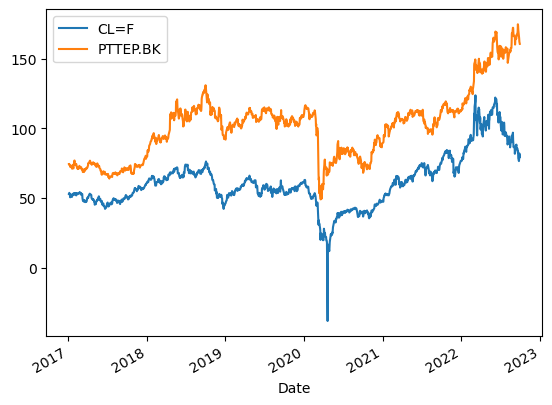

In [9]:
df.plot()

<AxesSubplot:xlabel='Date'>

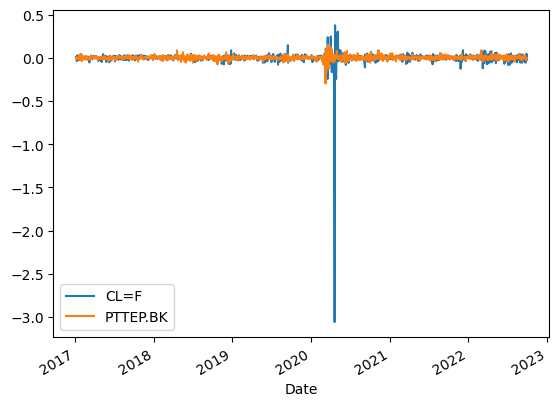

In [10]:

df.pct_change().plot()

<AxesSubplot:xlabel='Date'>

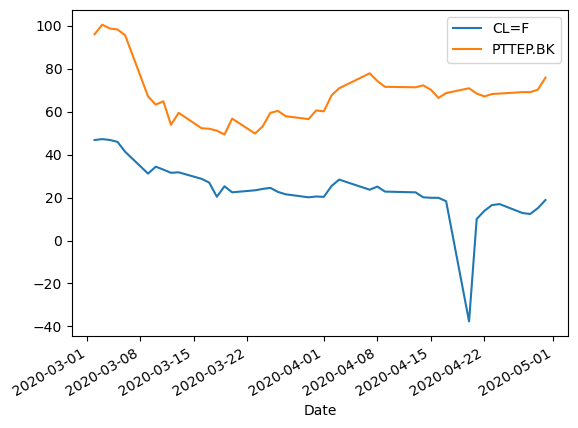

In [11]:
df.loc['2020-03':'2020-04'].plot()

<AxesSubplot:xlabel='Date'>

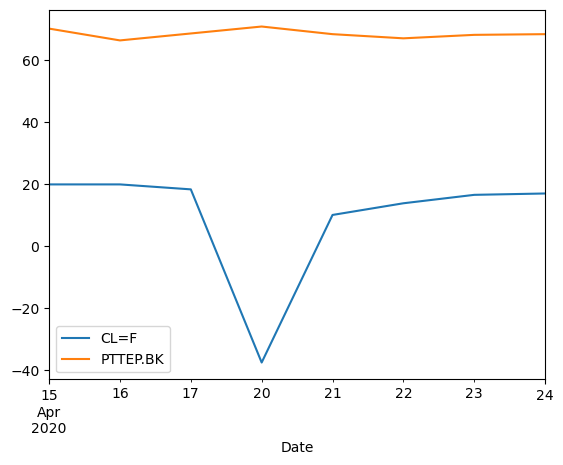

In [13]:
df.loc['2020-04-15':'2020-04-25'].plot()

In [38]:
df_ret = df.pct_change()
start_remove = '2020-04-18'
end_remove = '2020-04-22'


In [39]:
df_clean = df_ret.loc[:start_remove].append(df_ret.loc[end_remove:])


/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_8886/1675457969.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean = df_ret.loc[:start_remove].append(df_ret.loc[end_remove:])


In [40]:
df_clean

,CL=F,PTTEP.BK
Date,,
2017-01-04,NaN,NaN
2017-01-05,0.009388,-0.005076
2017-01-06,0.004278,0.005102
2017-01-09,-0.037600,-0.007615
2017-01-10,-0.021940,-0.017903
...,...,...
2022-09-26,-0.025781,-0.026393
2022-09-27,0.023335,-0.009036
2022-09-28,0.046497,-0.015198


In [41]:
df_clean.loc['2020-04-15':'2020-04-25']

,CL=F,PTTEP.BK
Date,,
2020-04-15,-0.011934,-0.027950
2020-04-16,0.000000,-0.054313
2020-04-17,-0.080523,0.033784
2020-04-22,0.376623,-0.019672
2020-04-23,0.197388,0.016722
2020-04-24,0.026667,0.003289


<AxesSubplot:xlabel='Date'>

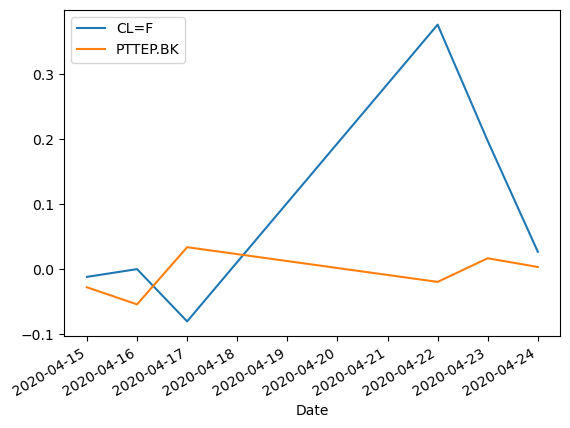

In [42]:
df_clean.loc['2020-04-15':'2020-04-25'].plot()

<AxesSubplot:xlabel='Date'>

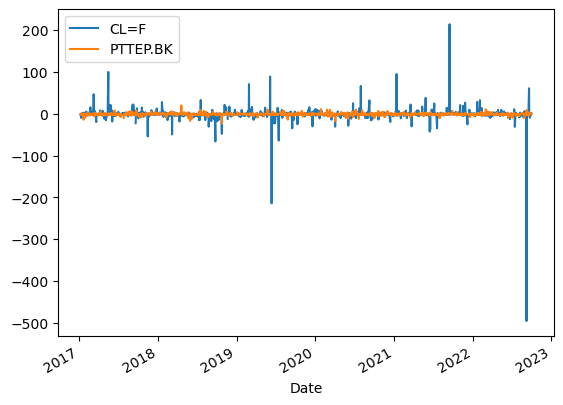

In [51]:
df_clean.pct_change().plot()

In [49]:
df_clean.loc['2021-12-15':]

,CL=F,PTTEP.BK
Date,,
2021-12-15,0.001979,-0.012500
2021-12-16,0.021307,0.008439
2021-12-17,-0.021000,0.004184
2021-12-20,-0.037115,-0.029167
2021-12-21,0.042357,0.008584
...,...,...
2022-09-26,-0.025781,-0.026393
2022-09-27,0.023335,-0.009036
2022-09-28,0.046497,-0.015198


<AxesSubplot:xlabel='CL=F', ylabel='PTTEP.BK'>

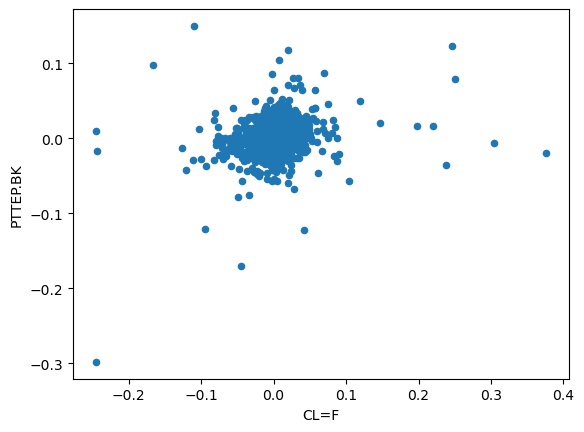

In [50]:
df_clean.plot.scatter(x='CL=F',y='PTTEP.BK')

In [52]:
X=df_clean['CL=F'].iloc[1:]
y= df_clean['PTTEP.BK'].iloc[1:]

In [53]:
m,c=np.polyfit(X,y,1)

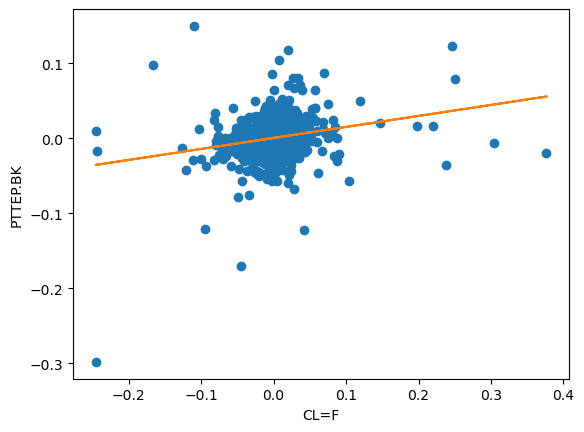

In [55]:
df_clean.plot.scatter(x='CL=F',y='PTTEP.BK',c='k')
plt.plot(X,y,'o')
plt.plot(X,m*X+c)

In [56]:
Lower_limit = df_clean.quantile(0.01)
Upper_limit = df_clean.quantile(0.99)

In [58]:
Lower_limit

CL=F       -0.081423
PTTEP.BK   -0.052030
Name: 0.01, dtype: float64

In [59]:
(df_clean > Lower_limit) | (df_clean > Upper_limit)

,CL=F,PTTEP.BK
Date,,
2017-01-04,False,False
2017-01-05,True,True
2017-01-06,True,True
2017-01-09,True,True
2017-01-10,True,True
...,...,...
2022-09-26,True,True
2022-09-27,True,True
2022-09-28,True,True


In [63]:
(df_clean<Lower_limit) | (df_clean> Upper_limit).any(1)

,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,2017-01-19 00:00:00,...,2022-09-21 00:00:00,2022-09-22 00:00:00,2022-09-23 00:00:00,2022-09-26 00:00:00,2022-09-27 00:00:00,2022-09-28 00:00:00,2022-09-29 00:00:00,2022-09-30 00:00:00,CL=F,PTTEP.BK
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-01-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-01-06,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-01-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-01-10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-09-27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-09-28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df_cleaner = df_clean[~((df_clean<Lower_limit) | (df_clean> Upper_limit)).any(1)]

<AxesSubplot:xlabel='CL=F', ylabel='PTTEP.BK'>

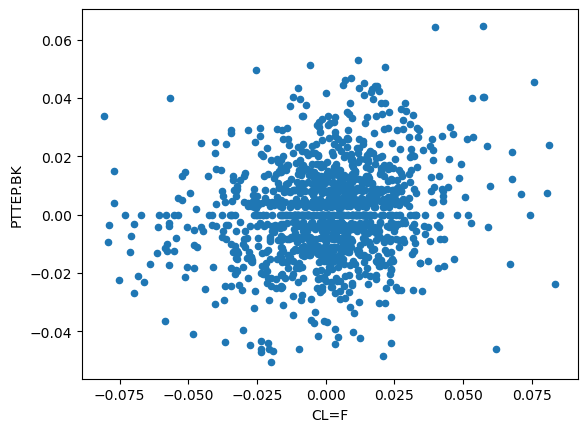

In [66]:
df_cleaner.plot.scatter(x='CL=F',y='PTTEP.BK')


In [68]:
df_cleaner

,CL=F,PTTEP.BK
Date,,
2017-01-04,NaN,NaN
2017-01-05,0.009388,-0.005076
2017-01-06,0.004278,0.005102
2017-01-09,-0.037600,-0.007615
2017-01-10,-0.021940,-0.017903
...,...,...
2022-09-26,-0.025781,-0.026393
2022-09-27,0.023335,-0.009036
2022-09-28,0.046497,-0.015198


In [69]:
df_cleaner.dropna()

,CL=F,PTTEP.BK
Date,,
2017-01-05,0.009388,-0.005076
2017-01-06,0.004278,0.005102
2017-01-09,-0.037600,-0.007615
2017-01-10,-0.021940,-0.017903
2017-01-11,0.028139,0.005209
...,...,...
2022-09-26,-0.025781,-0.026393
2022-09-27,0.023335,-0.009036
2022-09-28,0.046497,-0.015198


In [73]:
X=df_cleaner['CL=F']
y= df_cleaner['PTTEP.BK']

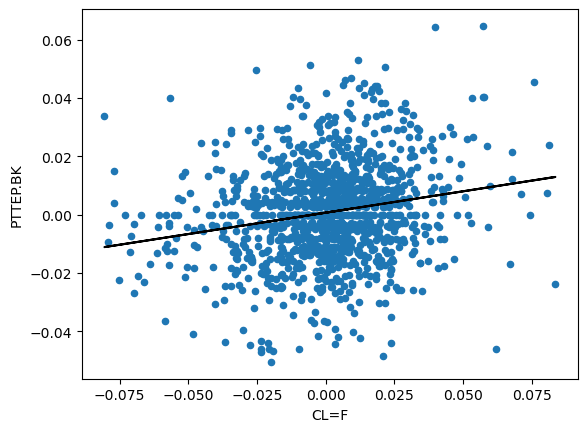

In [76]:
df_cleaner.plot.scatter(x='CL=F',y='PTTEP.BK')

plt.plot(X,m*X+c,color='k')

# let try ml model from sklearn

# predict PTTEP BY PTT ECOSYSTEM

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics

In [80]:
start='2017-01-01'
end='2021-10-01'

In [83]:
data=yf.download('CL=F PTTEP.BK GPSC.BK PTTGC.BK PTT.BK',start=start,end=end)

[*********************100%***********************]  5 of 5 completed


In [84]:
df=data['Adj Close']

In [85]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-03,52.330002,NaN,NaN,NaN,NaN
2017-01-04,53.259998,29.146652,29.128031,74.474823,48.913532
2017-01-05,53.759998,28.555843,29.664598,74.096771,49.104599
2017-01-06,53.990002,28.555843,29.817902,74.474823,48.913532
2017-01-09,51.959999,28.555843,29.357985,73.907753,48.340328
...,...,...,...,...,...
2021-09-24,73.980003,NaN,NaN,NaN,NaN
2021-09-27,75.449997,75.753326,37.146828,111.294357,58.820953
2021-09-28,75.290001,75.015472,37.146828,113.196823,60.726082


In [87]:
df =df.fillna(method='ffill').pct_change()

In [88]:
df=df.dropna()

In [ ]:
df=df[(df!=0).]

In [89]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,0.018421,-0.005076,0.003906
2017-01-06,0.004278,0.000000,0.005168,0.005102,-0.003891
2017-01-09,-0.037600,0.000000,-0.015424,-0.007614,-0.011719
2017-01-10,-0.021940,0.006896,0.013055,-0.017903,0.003953
2017-01-11,0.028139,0.006849,-0.007732,0.005208,-0.003937
...,...,...,...,...,...
2021-09-24,0.009277,0.000000,0.000000,0.000000,0.000000
2021-09-27,0.019870,-0.012821,0.012500,0.035398,0.020661
2021-09-28,-0.002121,-0.009740,0.000000,0.017094,0.032389


In [90]:
df = df[['CL=F','GPSC.BK', 'PTTEP.BK' , 'PTTGC.BK' ,'PTT.BK']]

In [91]:
df.head(1)

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,0.009388,-0.02027,-0.005076,0.003906,0.018421


In [92]:
X=df.iloc[:,:-1] # without pttbk
y=df.iloc[:,-1] # only pttbk

In [93]:
X

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2017-01-05,0.009388,-0.020270,-0.005076,0.003906
2017-01-06,0.004278,0.000000,0.005102,-0.003891
2017-01-09,-0.037600,0.000000,-0.007614,-0.011719
2017-01-10,-0.021940,0.006896,-0.017903,0.003953
2017-01-11,0.028139,0.006849,0.005208,-0.003937
...,...,...,...,...
2021-09-24,0.009277,0.000000,0.000000,0.000000
2021-09-27,0.019870,-0.012821,0.035398,0.020661
2021-09-28,-0.002121,-0.009740,0.017094,0.032389


In [94]:
y

Date
2017-01-05    0.018421
2017-01-06    0.005168
2017-01-09   -0.015424
2017-01-10    0.013055
2017-01-11   -0.007732
                ...   
2021-09-24    0.000000
2021-09-27    0.012500
2021-09-28    0.000000
2021-09-29   -0.001272
2021-09-30   -0.006369
Name: PTT.BK, Length: 1229, dtype: float64

In [95]:
model = LinearRegression()
reg=model.fit(X,y)


In [96]:
reg.score(X,y)

0.6930020040744118

# result is around 69%

In [97]:
reg.coef_

array([-0.0008743 ,  0.04342929,  0.4660136 ,  0.25859285])

In [98]:
X.iloc[-5]

CL=F        0.009277
GPSC.BK     0.000000
PTTEP.BK    0.000000
PTTGC.BK    0.000000
Name: 2021-09-24 00:00:00, dtype: float64

In [99]:
reg.predict(X.iloc[-5].values.reshape(1,-1))

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7.28099021e-05])

In [100]:
y.iloc[-5]

0.0

# this is real solution to create machine learning

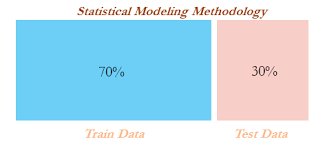

In [101]:
X_train,X_test ,y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [103]:
X_train

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2018-07-05,-0.016186,0.000000,-0.014870,-0.020408
2020-04-14,-0.102633,-0.033582,0.012579,0.035211
2018-10-17,-0.030172,-0.007519,-0.010135,0.016181
2021-04-09,-0.004698,0.003401,0.004505,0.008130
2021-07-20,0.015056,-0.006231,-0.018265,-0.021834
...,...,...,...,...
2018-10-23,-0.039613,0.000000,0.000000,0.000000
2018-03-02,0.004263,-0.006757,-0.004329,-0.002519
2018-11-29,0.023066,-0.009009,0.000000,0.003195


In [104]:
model = LinearRegression()
reg=model.fit(X_train,y_train)

In [105]:
reg.score(X_test,y_test)

0.677138014487511

In [107]:
y_pred=model.predict(X_test)

In [108]:
y_pred

array([ 1.06822972e-03, -6.08361983e-03, -9.59875772e-03,  1.19441048e-02,
       -1.20925748e-05, -6.67092359e-03, -2.23129414e-03, -1.16893735e-02,
       -8.20508254e-03, -2.96115292e-04,  9.63657737e-03,  7.89663348e-04,
       -1.57649076e-03, -4.17393616e-04,  7.55224223e-03,  4.73649673e-03,
        2.34852028e-03,  4.30439232e-03, -2.44439599e-02,  4.39207475e-04,
        1.39673691e-02, -1.10842014e-04,  1.64632286e-02, -4.16869024e-04,
       -3.71568682e-04, -2.57106355e-03, -8.03970342e-04,  3.25504505e-03,
        9.91532220e-03,  4.01103637e-03, -5.66139310e-04,  1.89764917e-03,
        1.22922374e-02,  5.13004696e-03, -5.41011953e-03,  2.40873594e-02,
        7.14304005e-05, -1.40654865e-03, -4.92050705e-03,  3.04429504e-02,
       -8.30268612e-03,  2.60706739e-03, -9.93591449e-03, -2.16089067e-04,
        7.41811534e-03, -1.81060806e-02, -1.80721767e-03,  1.67278968e-03,
       -2.30056081e-03, -6.83467241e-03, -1.69893881e-03,  1.26038316e-02,
        9.39950872e-03,  

In [109]:
print('Score = ',metrics.r2_score(y_test,y_pred))

Score =  0.677138014487511


In [110]:
reg.coef_

array([-0.00336659,  0.03775117,  0.45493335,  0.26257137])

In [111]:
m=model.coef_
b=model.intercept_

In [112]:
m

array([-0.00336659,  0.03775117,  0.45493335,  0.26257137])

In [113]:
b

-0.00034629297368207084

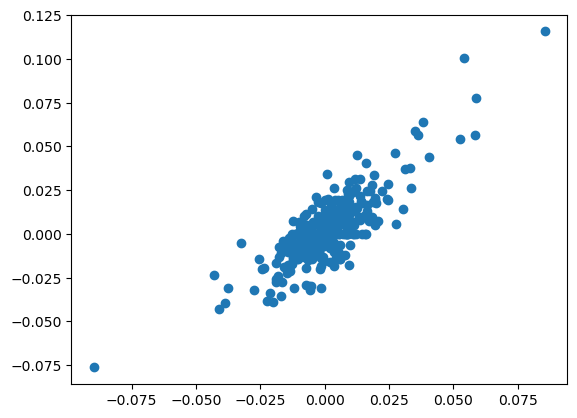

In [114]:
plt.scatter(y_pred,y_test)


In [115]:
print('MAE = ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE =',metrics.mean_squared_error(y_test,y_pred))
print('RMSE = ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  0.007780711981282307
MSE = 0.00010917101267642652
RMSE =  0.010448493320877729
